In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df=pd.read_csv("house.csv")
df.head()
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [30]:
x=df[['sqft_living']]
y=df['price']

In [31]:
lr=LinearRegression()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)
lr.fit(x_train,y_train)
lrcoeff=lr.coef_
lr.score(x_test,y_test)
ypred=lr.predict(x_test)

In [34]:
r2_score(y_test,ypred)

0.5030774643470591

In [30]:
pf=PolynomialFeatures(3)

In [31]:
x_poly=pf.fit_transform(x)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3,random_state=1)
lr.fit(x_train,y_train)
lrcoeff=lr.coef_
lr.score(x_test,y_test)
ypred=lr.predict(x_test)

In [33]:
r2_score(ytest,ypred)

0.5401886537626621

In [42]:
for i in range(10):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3,random_state=1)
    lr.fit(x_train,y_train)
    lrcoeff=lr.coef_
    lr.score(x_test,y_test)
    ypred=lr.predict(x_test)
    r2=r2_score(ytest,ypred)
    print('for',i,'th iteration',r2)

for 0 th iteration -0.0004076018354877142
for 1 th iteration 0.5036600219422225
for 2 th iteration 0.5335883908330629
for 3 th iteration 0.5640337838782349
for 4 th iteration 0.2243107274739844
for 5 th iteration -1.6586485088411824
for 6 th iteration -4.7349476643842925
for 7 th iteration -106.36894839942364
for 8 th iteration -6193.856207856098
for 9 th iteration -117683.74394095626


In [46]:
for i in range(10):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3,random_state=1)
    lr.fit(x_train,y_train)
    lrcoeff=lr.coef_
    lr.score(x_test,y_test)
    ypred=lr.predict(x_test)
    r2=r2_score(y_test,ypred)
    print('for',i,'th iteration',r2)

for 0 th iteration -0.0004076018354877142
for 1 th iteration 0.545341811002674
for 2 th iteration 0.6315684108254053
for 3 th iteration 0.6369558096117698
for 4 th iteration 0.08438909214162871
for 5 th iteration -6.551038529659889
for 6 th iteration -117.71042815640251
for 7 th iteration -1068.6915807042972
for 8 th iteration -20418.871987375693
for 9 th iteration -866520.2660131545


In [5]:
x=df[['sqft_living','sqft_above','grade','floors','view']]
y=df['price']
for i in range(5):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3,random_state=1)
    lr.fit(x_train,y_train)
    lrcoeff=lr.coef_
    lr.score(x_test,y_test)
    ypred=lr.predict(x_test)
    r2=r2_score(y_test,ypred)
    print('for',i,'th iteration',r2)

for 0 th iteration -0.0004076018354877142
for 1 th iteration 0.5805562158695727
for 2 th iteration 0.6556664868495445
for 3 th iteration 0.6549166869949739
for 4 th iteration -1.3165764312882917


In [36]:
pf=PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
X_train, X_test_poly, y_train, y_test = train_test_split(x_poly, y, test_size=0.3,random_state=1)
lr.fit(X_train,y_train)
lrcoeff=lr.coef_
lr.score(X_test_poly,y_test)
ypred=lr.predict(X_test_poly)
r2_score(y_test,ypred)

0.5401886537626621

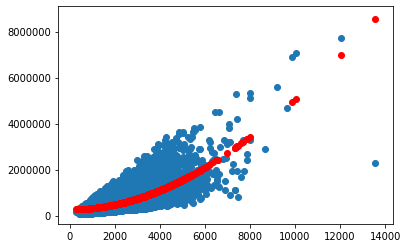

In [38]:
plt.figure()
plt.scatter(x,y)
plt.scatter(x_test,ypred,color='red')
plt.show()